<a href="https://colab.research.google.com/github/KornelWitkowski/TensorFlow-benchmarks/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification

## Fashion MNIST

### Data preparation 

In [1]:
import os
import tensorflow as tf

from tensorflow.keras import datasets

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

len(train_images), len(test_images)

(60000, 10000)

In [3]:
class_names = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

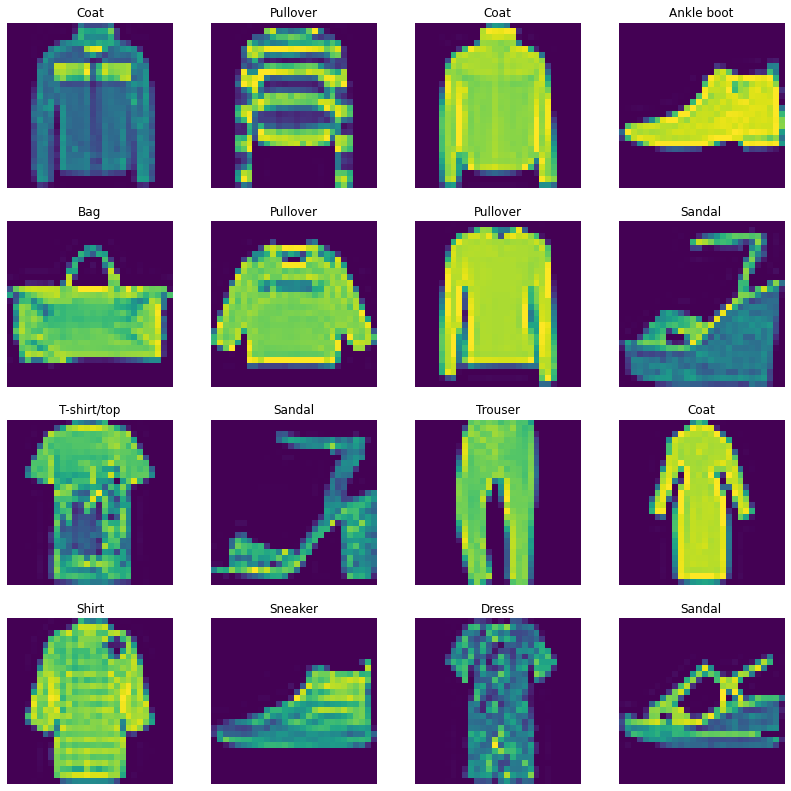

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4,4, figsize=(14,14))

for i in range(16):
    j = np.random.randint(60000)
    axs[i//4, i%4].imshow(train_images[j])
    axs[i//4, i%4].set_title(class_names[train_labels[j]])
    axs[i//4, i%4].axis("off")

In [5]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [38]:
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras import Sequential

data_augmentation = Sequential([RandomFlip("horizontal")])

### Model & Traning

In [39]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, Reshape, Dropout
from tensorflow.keras import Sequential

MODEL_NAME = "model_fashion_mnist"

model = Sequential(name="model_fashion_mnist")
model.add(data_augmentation)
model.add(Rescaling(1/255.0))
model.add(Reshape((28, 28, 1)))
model.add(Conv2D(8, 2, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
from utils import create_model_checkpoint, reduce_lr

history = model.fit(train_dataset,
                    validation_data=test_dataset,
                    epochs=30,
                    callbacks=[reduce_lr(), create_model_checkpoint(model.name) ])

Epoch 1/30
1875/1875 [==============================] - ETA: 0s - loss: 0.5904 - accuracy: 0.7888

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 30s 15ms/step - loss: 0.5904 - accuracy: 0.7888 - val_loss: 0.4415 - val_accuracy: 0.8466 - lr: 0.0010
Epoch 2/30
1871/1875 [============================>.] - ETA: 0s - loss: 0.4291 - accuracy: 0.8466

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 27s 14ms/step - loss: 0.4290 - accuracy: 0.8466 - val_loss: 0.3715 - val_accuracy: 0.8685 - lr: 0.0010
Epoch 3/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3879 - accuracy: 0.8598 - val_loss: 0.3622 - val_accuracy: 0.8680 - lr: 0.0010
Epoch 4/30
1875/1875 [==============================] - ETA: 0s - loss: 0.3588 - accuracy: 0.8697

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 21s 11ms/step - loss: 0.3588 - accuracy: 0.8697 - val_loss: 0.3374 - val_accuracy: 0.8796 - lr: 0.0010
Epoch 5/30
1875/1875 [==============================] - ETA: 0s - loss: 0.3426 - accuracy: 0.8765

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 23s 12ms/step - loss: 0.3426 - accuracy: 0.8765 - val_loss: 0.3248 - val_accuracy: 0.8855 - lr: 0.0010
Epoch 6/30
1870/1875 [============================>.] - ETA: 0s - loss: 0.3302 - accuracy: 0.8797

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 22s 12ms/step - loss: 0.3302 - accuracy: 0.8797 - val_loss: 0.3113 - val_accuracy: 0.8863 - lr: 0.0010
Epoch 7/30
1873/1875 [============================>.] - ETA: 0s - loss: 0.3195 - accuracy: 0.8830

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 0.3195 - accuracy: 0.8829 - val_loss: 0.2980 - val_accuracy: 0.8918 - lr: 0.0010
Epoch 8/30
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3106 - accuracy: 0.8863 - val_loss: 0.3164 - val_accuracy: 0.8867 - lr: 0.0010
Epoch 9/30
1874/1875 [============================>.] - ETA: 0s - loss: 0.3003 - accuracy: 0.8886

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 27s 14ms/step - loss: 0.3003 - accuracy: 0.8886 - val_loss: 0.2899 - val_accuracy: 0.8944 - lr: 0.0010
Epoch 10/30
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2973 - accuracy: 0.8902 - val_loss: 0.2965 - val_accuracy: 0.8898 - lr: 0.0010
Epoch 11/30
1872/1875 [============================>.] - ETA: 0s - loss: 0.2915 - accuracy: 0.8920

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 0.2915 - accuracy: 0.8920 - val_loss: 0.2911 - val_accuracy: 0.8961 - lr: 0.0010
Epoch 12/30
1871/1875 [============================>.] - ETA: 0s - loss: 0.2827 - accuracy: 0.8967

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 23s 12ms/step - loss: 0.2825 - accuracy: 0.8968 - val_loss: 0.2821 - val_accuracy: 0.8979 - lr: 0.0010
Epoch 13/30
1875/1875 [==============================] - ETA: 0s - loss: 0.2797 - accuracy: 0.8965

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 17s 9ms/step - loss: 0.2797 - accuracy: 0.8965 - val_loss: 0.2833 - val_accuracy: 0.8984 - lr: 0.0010
Epoch 14/30
1870/1875 [============================>.] - ETA: 0s - loss: 0.2732 - accuracy: 0.8990

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 16s 8ms/step - loss: 0.2731 - accuracy: 0.8991 - val_loss: 0.2741 - val_accuracy: 0.9005 - lr: 0.0010
Epoch 15/30
1871/1875 [============================>.] - ETA: 0s - loss: 0.2716 - accuracy: 0.9003

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 16s 9ms/step - loss: 0.2715 - accuracy: 0.9003 - val_loss: 0.2756 - val_accuracy: 0.9013 - lr: 0.0010
Epoch 16/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2668 - accuracy: 0.9016 - val_loss: 0.2733 - val_accuracy: 0.8982 - lr: 0.0010
Epoch 17/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2635 - accuracy: 0.9026 - val_loss: 0.2818 - val_accuracy: 0.8981 - lr: 0.0010
Epoch 18/30
1872/1875 [============================>.] - ETA: 0s - loss: 0.2606 - accuracy: 0.9028

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 18s 9ms/step - loss: 0.2604 - accuracy: 0.9029 - val_loss: 0.2702 - val_accuracy: 0.9025 - lr: 0.0010
Epoch 19/30
1872/1875 [============================>.] - ETA: 0s - loss: 0.2589 - accuracy: 0.9050

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 17s 9ms/step - loss: 0.2587 - accuracy: 0.9051 - val_loss: 0.2718 - val_accuracy: 0.9033 - lr: 0.0010
Epoch 20/30
1873/1875 [============================>.] - ETA: 0s - loss: 0.2517 - accuracy: 0.9064

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 17s 9ms/step - loss: 0.2516 - accuracy: 0.9065 - val_loss: 0.2672 - val_accuracy: 0.9051 - lr: 0.0010
Epoch 21/30
1875/1875 [==============================] - ETA: 0s - loss: 0.2514 - accuracy: 0.9072

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 16s 9ms/step - loss: 0.2514 - accuracy: 0.9072 - val_loss: 0.2652 - val_accuracy: 0.9058 - lr: 0.0010
Epoch 22/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2495 - accuracy: 0.9073 - val_loss: 0.2700 - val_accuracy: 0.9047 - lr: 0.0010
Epoch 23/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2475 - accuracy: 0.9081 - val_loss: 0.2680 - val_accuracy: 0.9023 - lr: 0.0010
Epoch 24/30
1870/1875 [============================>.] - ETA: 0s - loss: 0.2437 - accuracy: 0.9093
Epoch 24: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2436 - accuracy: 0.9094 - val_loss: 0.2644 - val_accuracy: 0.9047 - lr: 0.0010
Epoch 25/30
1873/1875 [============================>.] - ETA: 0s - loss: 0.2266 - accuracy: 0.9149

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 18s 10ms/step - loss: 0.2265 - accuracy: 0.9149 - val_loss: 0.2551 - val_accuracy: 0.9078 - lr: 1.0000e-04
Epoch 26/30
1874/1875 [============================>.] - ETA: 0s - loss: 0.2167 - accuracy: 0.9202

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 16s 9ms/step - loss: 0.2166 - accuracy: 0.9202 - val_loss: 0.2538 - val_accuracy: 0.9091 - lr: 1.0000e-04
Epoch 27/30
1874/1875 [============================>.] - ETA: 0s - loss: 0.2152 - accuracy: 0.9199

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 16s 8ms/step - loss: 0.2154 - accuracy: 0.9199 - val_loss: 0.2542 - val_accuracy: 0.9095 - lr: 1.0000e-04
Epoch 28/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2160 - accuracy: 0.9211 - val_loss: 0.2526 - val_accuracy: 0.9095 - lr: 1.0000e-04
Epoch 29/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2116 - accuracy: 0.9218 - val_loss: 0.2525 - val_accuracy: 0.9083 - lr: 1.0000e-04
Epoch 30/30
1872/1875 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9212

INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


INFO:tensorflow:Assets written to: models\model_fashion_mnist\assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.2119 - accuracy: 0.9213 - val_loss: 0.2519 - val_accuracy: 0.9105 - lr: 1.0000e-04


### Results 

In [7]:
model_best = tf.keras.models.load_model(f"models/{MODEL_NAME}")

_, train_acc = model_best.evaluate(train_images, train_labels)
_, test_acc = model_best.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.2519 - accuracy: 0.9105


In [8]:
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 0.9502500295639038
Test accuracy: 0.9104999899864197


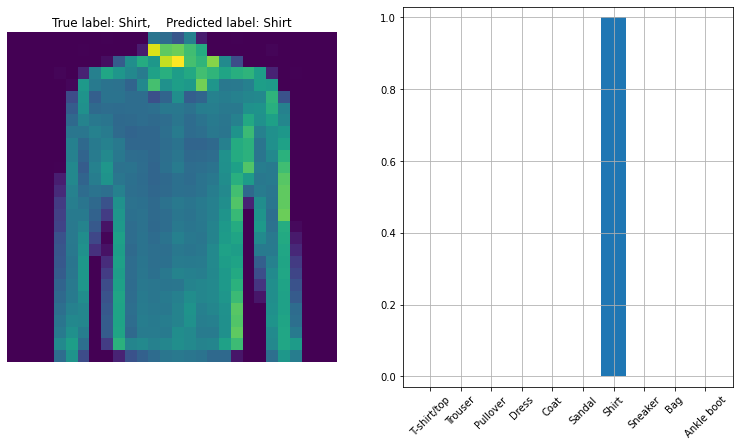

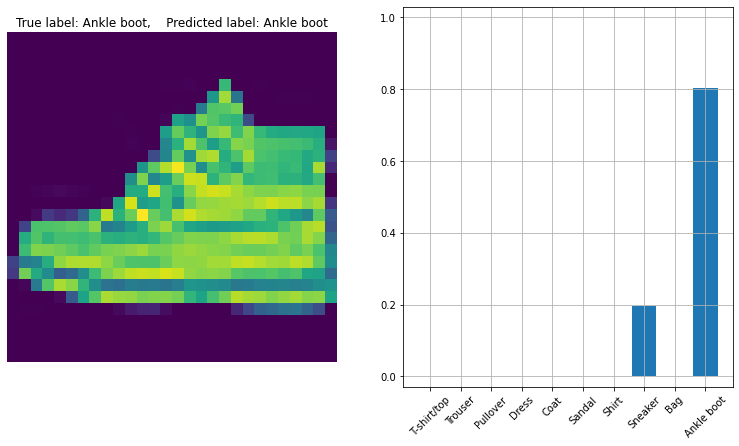

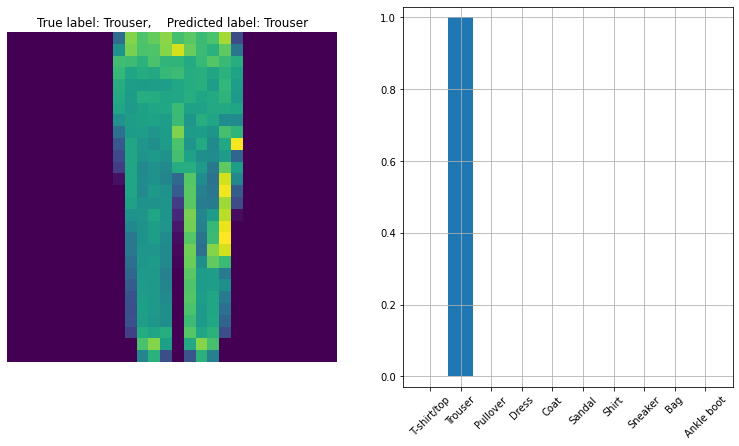

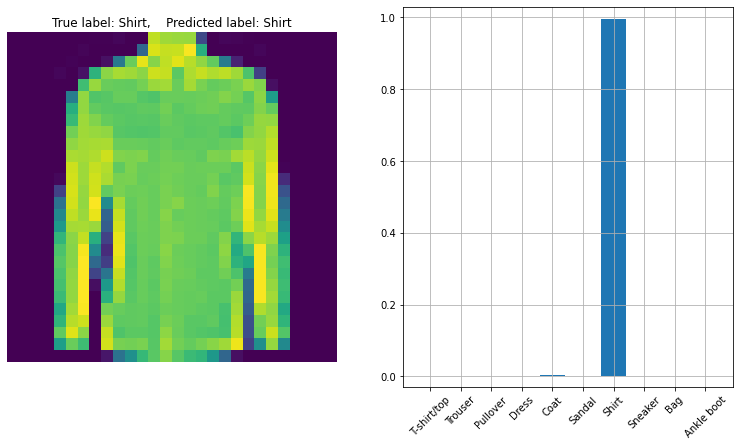

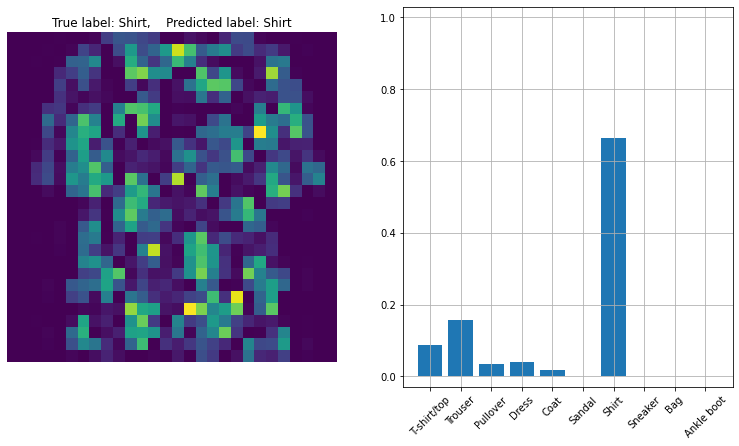

In [12]:
import warnings
from utils import predict_class

warnings.filterwarnings("ignore")

for i in range(5):
  predict_class(model_best, test_images, test_labels, class_names)

## horses_or_humans

### Data preparation

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [49]:
(train_data, test_data), ds_info = tfds.load(name="horses_or_humans",
                                             split=["train", "test"],
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info=True)

ds_info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_path='~\\tensorflow_datasets\\horses_or_humans\\3.0.0',
    file_format=tfrecord,
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=256, num_shards=1>,
        'train': <SplitInfo num_examples=1027, num_shards=2>,
    },
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
)

In [15]:
len(train_data), len(test_data)

(1027, 256)

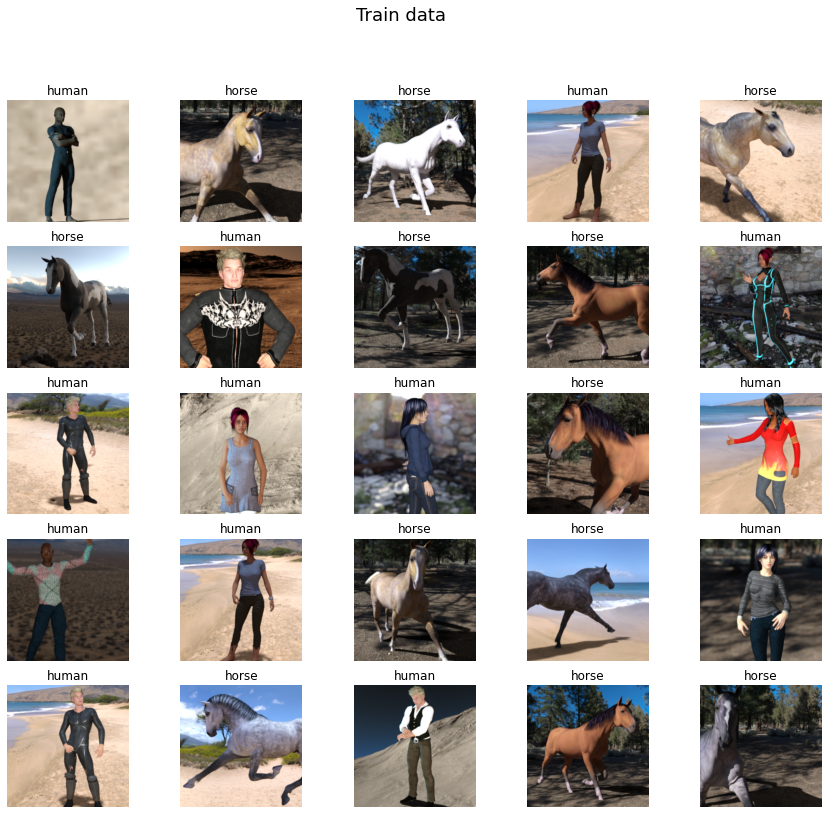

In [32]:
import matplotlib.pyplot as plt

class_names = ["horse", "human"]

fig, axs = plt.subplots(5, 5, figsize=(15, 13))
fig.suptitle('Train data', fontsize=18)

for i, (image, label) in enumerate(train_data.take(25)):
  axs[i//5, i%5].imshow(image)
  axs[i//5, i%5].set_title(f"{class_names[label]}")
  axs[i//5, i%5].axis("off")

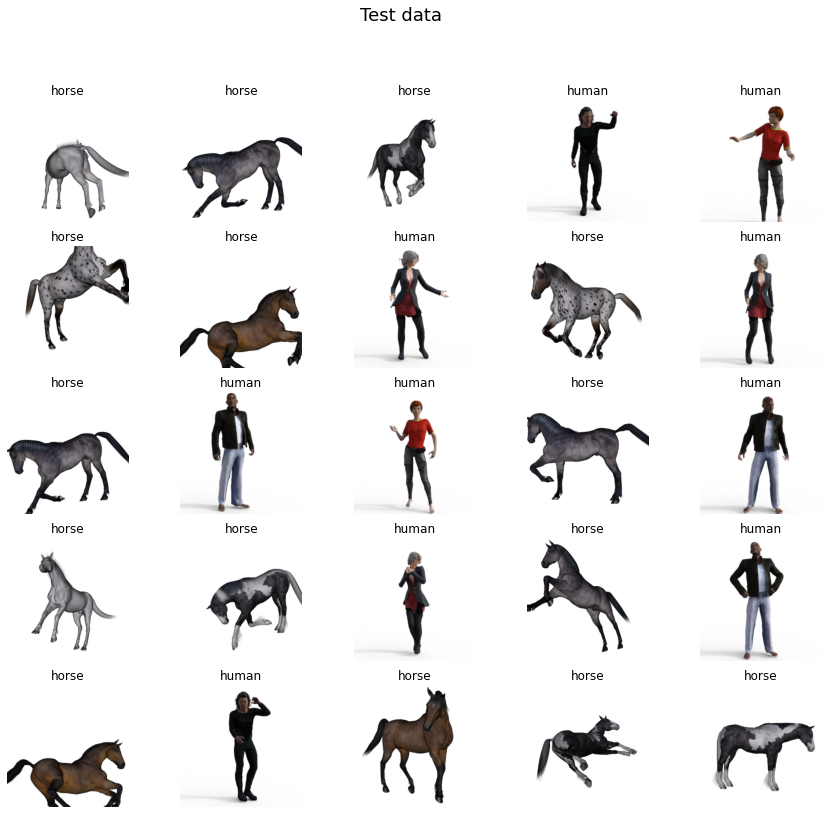

In [17]:
fig, axs = plt.subplots(5, 5, figsize=(15, 13))
fig.suptitle('Test data', fontsize=18)

for i, (image, label) in enumerate(test_data.take(25)):
  axs[i//5, i%5].imshow(image)
  axs[i//5, i%5].set_title(f"{class_names[label]}")
  axs[i//5, i%5].axis("off")

In [51]:
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

### Model & Training

In [47]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling, Dropout

from utils import create_model_checkpoint, reduce_lr

MODEL_NAME = "model_humans_and_horses"

model = Sequential([Rescaling(1/255.0),
                    Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
                    MaxPooling2D(2, 2),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    tf.keras.layers.Flatten(),
                    Dropout(0.3),
                    tf.keras.layers.Dense(512, activation='relu'),
                    Dropout(0.3),
                    Dense(256),
                    Dense(1, activation="sigmoid")
], name=MODEL_NAME)

model.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [20]:
history = model.fit(train_data,
                    epochs=20,
                    validation_steps=2,
                    validation_data=test_data,
                    callbacks=[reduce_lr(), create_model_checkpoint(model.name)])

Epoch 1/20
33/33 [==============================] - ETA: 0s - loss: 0.4108 - accuracy: 0.7848

INFO:tensorflow:Assets written to: models\model_humans_and_horses\assets


INFO:tensorflow:Assets written to: models\model_humans_and_horses\assets


33/33 [==============================] - 15s 331ms/step - loss: 0.4108 - accuracy: 0.7848 - val_loss: 0.8717 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 2/20
32/33 [============================>.] - ETA: 0s - loss: 0.1599 - accuracy: 0.9326

INFO:tensorflow:Assets written to: models\model_humans_and_horses\assets


INFO:tensorflow:Assets written to: models\model_humans_and_horses\assets


33/33 [==============================] - 10s 288ms/step - loss: 0.1596 - accuracy: 0.9328 - val_loss: 0.7599 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 3/20
33/33 [==============================] - 9s 233ms/step - loss: 0.0734 - accuracy: 0.9688 - val_loss: 1.7112 - val_accuracy: 0.8281 - lr: 0.0010
Epoch 4/20
33/33 [==============================] - 9s 233ms/step - loss: 0.0948 - accuracy: 0.9708 - val_loss: 0.9568 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 5/20
32/33 [============================>.] - ETA: 0s - loss: 0.1091 - accuracy: 0.9609
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
33/33 [==============================] - 8s 232ms/step - loss: 0.1088 - accuracy: 0.9611 - val_loss: 1.1462 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 6/20
32/33 [============================>.] - ETA: 0s - loss: 0.0445 - accuracy: 0.9844

INFO:tensorflow:Assets written to: models\model_humans_and_horses\assets


INFO:tensorflow:Assets written to: models\model_humans_and_horses\assets


33/33 [==============================] - 11s 302ms/step - loss: 0.0444 - accuracy: 0.9844 - val_loss: 0.6600 - val_accuracy: 0.9375 - lr: 1.0000e-04
Epoch 7/20
33/33 [==============================] - 9s 234ms/step - loss: 0.0162 - accuracy: 0.9961 - val_loss: 0.7646 - val_accuracy: 0.9375 - lr: 1.0000e-04
Epoch 8/20
33/33 [==============================] - 9s 234ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.8398 - val_accuracy: 0.9375 - lr: 1.0000e-04
Epoch 9/20
32/33 [============================>.] - ETA: 0s - loss: 0.0087 - accuracy: 0.9980
Epoch 9: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
33/33 [==============================] - 9s 235ms/step - loss: 0.0087 - accuracy: 0.9981 - val_loss: 0.8141 - val_accuracy: 0.9375 - lr: 1.0000e-04
Epoch 10/20
33/33 [==============================] - 9s 234ms/step - loss: 0.0088 - accuracy: 0.9990 - val_loss: 0.8172 - val_accuracy: 0.9375 - lr: 1.0000e-05
Epoch 11/20
33/33 [==============================] - 9

### Results

In [44]:
model_best = tf.keras.models.load_model(f"models/{MODEL_NAME}")

_, train_acc = model_best.evaluate(train_data)
_, test_acc = model_best.evaluate(test_data)

46/46 [==============================] - 5s 105ms/step - loss: 1.2732 - accuracy: 0.4278


In [45]:
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 0.4294959008693695
Test accuracy: 0.42779290676116943


## rock_paper_scissors

### Data preparation

In [48]:
import tensorflow_datasets as tfds

(train_dataset, test_dataset), ds_info = tfds.load(name='rock_paper_scissors',
                                                   data_dir='tmp',
                                                   as_supervised=True,
                                                   with_info=True,
                                                   split=[tfds.Split.TRAIN, tfds.Split.TEST] )

In [49]:
ds_info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='tmp\\rock_paper_scissors\\3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)

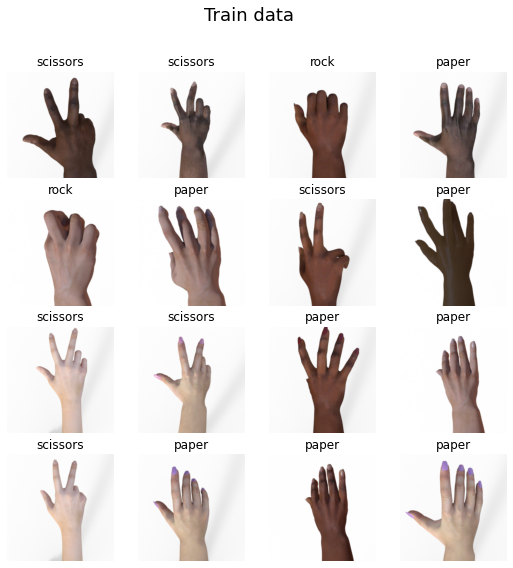

In [50]:
from matplotlib import axes
import matplotlib.pyplot as plt

class_names = ["rock", "paper", "scissors"]

fig, axs = plt.subplots(4, 4, figsize=(9, 9))
fig.suptitle('Train data', fontsize=18)

for i, (image, label) in enumerate(train_dataset.take(16)):

  axs[i//4, i%4].imshow(image)
  axs[i//4, i%4].set_title(f"{class_names[label]}")
  axs[i//4, i%4].axis("off")

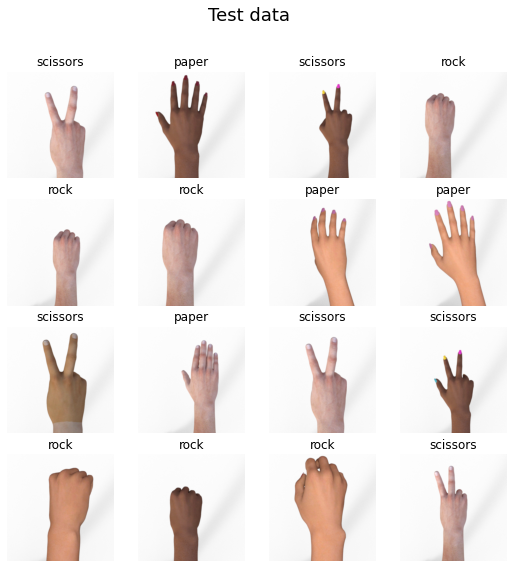

In [24]:
fig, axs = plt.subplots(4, 4, figsize=(9, 9))
fig.suptitle('Test data', fontsize=18)

for i, (image, label) in enumerate(test_dataset.take(16)):

  axs[i//4, i%4].imshow(image)
  axs[i//4, i%4].set_title(f"{class_names[label]}")
  axs[i//4, i%4].axis("off")

In [51]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomTranslation
from tensorflow.keras import Sequential

data_augmentation = Sequential([RandomFlip("horizontal"),
                                RandomRotation(0.05),
                                RandomZoom(0.05),
                                RandomTranslation(0.05, 0.05)])

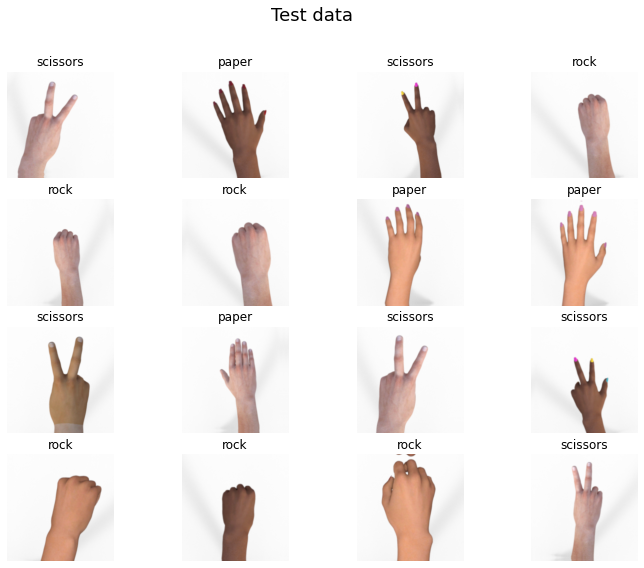

In [52]:
fig, axs = plt.subplots(4, 4, figsize=(12, 9))
fig.suptitle('Test data', fontsize=18)

for i, (image, label) in enumerate(test_dataset.take(16)):
  aug_image = data_augmentation(image, training=True)
  axs[i//4, i%4].imshow(aug_image/255.0)
  axs[i//4, i%4].set_title(f"{class_names[label]}")
  axs[i//4, i%4].axis("off")

In [59]:
import tensorflow as tf

train_data = train_dataset.shuffle(buffer_size=1000).batch(batch_size=8).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_dataset.batch(8).prefetch(tf.data.AUTOTUNE)

### Model & Traning

In [62]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling, Dropout

MODEL_NAME = "model_rock_paper_scissors"

model = Sequential([  
                      Rescaling(1/255.0),
                      Conv2D(filters=64, kernel_size=4, input_shape=(300, 300, 3)),
                      MaxPooling2D(pool_size=2, strides=2),
                      Conv2D(filters=64, kernel_size=4),
                      MaxPooling2D(pool_size=2, strides=2),
                      Conv2D(128, 3, activation="relu"),
                      MaxPooling2D(pool_size=2),
                      Conv2D(128, 3, activation="relu"),
                      MaxPooling2D(pool_size=2),
                      Flatten(),
                      Dropout(0.4),
                      Dense(256, activation="relu"),
                      Dropout(0.4),
                      Dense(3, activation="softmax")
], name=MODEL_NAME)

model.compile(loss="sparse_categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [63]:
from utils import create_model_checkpoint, reduce_lr


history = model.fit(train_data,
                    epochs=10,
                    validation_data=test_data,
                    callbacks=[reduce_lr(), create_model_checkpoint(model.name)])

Epoch 1/10
315/315 [==============================] - ETA: 0s - loss: 0.5039 - accuracy: 0.8083

INFO:tensorflow:Assets written to: models\model_rock_paper_scissors\assets


INFO:tensorflow:Assets written to: models\model_rock_paper_scissors\assets


315/315 [==============================] - 76s 239ms/step - loss: 0.5039 - accuracy: 0.8083 - val_loss: 2.6563 - val_accuracy: 0.5806 - lr: 0.0010
Epoch 2/10
315/315 [==============================] - ETA: 0s - loss: 0.3213 - accuracy: 0.9266

INFO:tensorflow:Assets written to: models\model_rock_paper_scissors\assets


INFO:tensorflow:Assets written to: models\model_rock_paper_scissors\assets


315/315 [==============================] - 76s 240ms/step - loss: 0.3213 - accuracy: 0.9266 - val_loss: 1.2449 - val_accuracy: 0.7231 - lr: 0.0010
Epoch 3/10
315/315 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.9929

INFO:tensorflow:Assets written to: models\model_rock_paper_scissors\assets


INFO:tensorflow:Assets written to: models\model_rock_paper_scissors\assets


315/315 [==============================] - 76s 240ms/step - loss: 0.0237 - accuracy: 0.9929 - val_loss: 1.0989 - val_accuracy: 0.8065 - lr: 0.0010
Epoch 4/10
315/315 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9980

INFO:tensorflow:Assets written to: models\model_rock_paper_scissors\assets


INFO:tensorflow:Assets written to: models\model_rock_paper_scissors\assets


315/315 [==============================] - 76s 239ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 1.1059 - val_accuracy: 0.8280 - lr: 0.0010
Epoch 5/10
315/315 [==============================] - ETA: 0s - loss: 0.0323 - accuracy: 0.9929

INFO:tensorflow:Assets written to: models\model_rock_paper_scissors\assets


INFO:tensorflow:Assets written to: models\model_rock_paper_scissors\assets


315/315 [==============================] - 76s 242ms/step - loss: 0.0323 - accuracy: 0.9929 - val_loss: 1.2887 - val_accuracy: 0.8710 - lr: 0.0010
Epoch 6/10
315/315 [==============================] - 73s 233ms/step - loss: 0.7376 - accuracy: 0.7925 - val_loss: 1.1058 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 7/10
315/315 [==============================] - 73s 232ms/step - loss: 0.5642 - accuracy: 0.7512 - val_loss: 1.2950 - val_accuracy: 0.7715 - lr: 0.0010
Epoch 8/10
315/315 [==============================] - ETA: 0s - loss: 0.3138 - accuracy: 0.8921
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
315/315 [==============================] - 73s 233ms/step - loss: 0.3138 - accuracy: 0.8921 - val_loss: 1.6849 - val_accuracy: 0.6317 - lr: 0.0010
Epoch 9/10
315/315 [==============================] - 73s 231ms/step - loss: 0.7029 - accuracy: 0.7159 - val_loss: 1.4877 - val_accuracy: 0.6129 - lr: 1.0000e-04
Epoch 10/10
315/315 [==============================] - 

### Results

In [64]:
model_best = tf.keras.models.load_model(f"models/{model.name}")

_, train_acc = model_best.evaluate(train_data, verbose=0)
_, test_acc = model_best.evaluate(test_data, verbose=0)

print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 1.0
Test accuracy: 0.8709677457809448


## MNIST

### Data preparation

In [1]:
import tensorflow_datasets as tfds

mnist_data, info = tfds.load("mnist",
                              shuffle_files=True,
                              with_info=True,
                              as_supervised=True)

mnist_train, mnist_test = mnist_data["train"], mnist_data["test"]

len(mnist_train), len(mnist_test)

(60000, 10000)

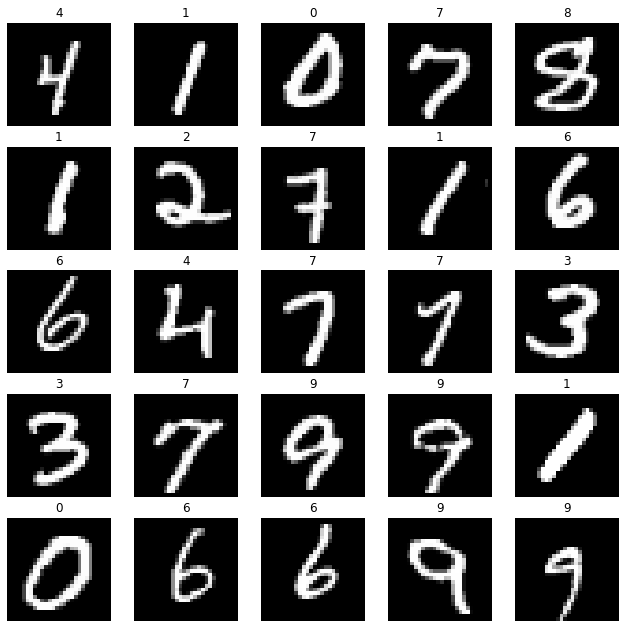

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import get_images_and_labels_from_dataset

train_images, train_labels = get_images_and_labels_from_dataset(mnist_train)
N = 5

fig, ax = plt.subplots(5,5, figsize=(11,11))

for i in range(N**2):
  image = train_images[i]
  label = train_labels[i]
  ax[i//N,i%N].imshow(image, cmap='gray')
  ax[i//N,i%N].axis(False)
  ax[i//N,i%N].set_title(str(label))

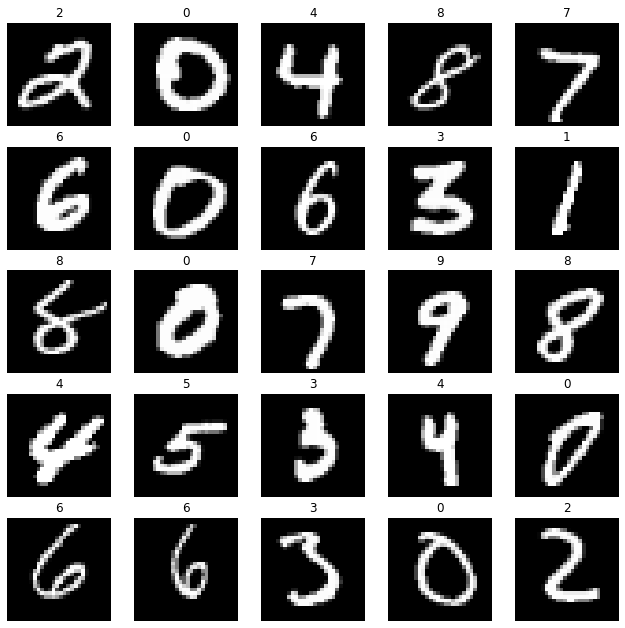

In [4]:
import matplotlib.pyplot as plt

test_images, test_labels = get_images_and_labels_from_dataset(mnist_test)
N = 5

fig, ax = plt.subplots(5,5, figsize=(11,11))

for i in range(N**2):
  image = test_images[i]
  label = test_labels[i]
  ax[i//N,i%N].imshow(image, cmap='gray')
  ax[i//N,i%N].axis(False)
  ax[i//N,i%N].set_title(str(label))

In [5]:
import tensorflow as tf

train_dataset = mnist_train.batch(128).shuffle(1000).prefetch(tf.data.AUTOTUNE)
test_dataset = mnist_test.batch(128).prefetch(tf.data.AUTOTUNE)

### Model & Traning

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Rescaling, Reshape, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

MODEL_NAME = "model_MNIST"

model = Sequential([Rescaling(1/255.0),
                    Reshape((28, 28, 1)),
                    Conv2D(4, (2, 2), activation='relu', input_shape=(28, 28, 1)), 
                    MaxPooling2D((2, 2)),
                    Flatten(),      
                    Dense(256, "relu"),
                    Dropout(0.2),
                    Dense(10, activation="softmax")], name=MODEL_NAME)

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [9]:
from utils import reduce_lr, create_model_checkpoint

model.fit(train_dataset,
          epochs=30,
          steps_per_epoch=len(train_dataset),
          validation_data=test_dataset,
          callbacks=[reduce_lr(), create_model_checkpoint(model.name)]
)

Epoch 1/30
466/469 [============================>.] - ETA: 0s - loss: 0.3665 - accuracy: 0.8975

INFO:tensorflow:Assets written to: models\model_MNIST\assets


INFO:tensorflow:Assets written to: models\model_MNIST\assets


469/469 [==============================] - 5s 10ms/step - loss: 0.3653 - accuracy: 0.8978 - val_loss: 0.1665 - val_accuracy: 0.9487 - lr: 0.0010
Epoch 2/30
464/469 [============================>.] - ETA: 0s - loss: 0.1501 - accuracy: 0.9543

INFO:tensorflow:Assets written to: models\model_MNIST\assets


INFO:tensorflow:Assets written to: models\model_MNIST\assets


469/469 [==============================] - 5s 10ms/step - loss: 0.1498 - accuracy: 0.9545 - val_loss: 0.1126 - val_accuracy: 0.9653 - lr: 0.0010
Epoch 3/30
461/469 [============================>.] - ETA: 0s - loss: 0.1098 - accuracy: 0.9662

INFO:tensorflow:Assets written to: models\model_MNIST\assets


INFO:tensorflow:Assets written to: models\model_MNIST\assets


469/469 [==============================] - 5s 9ms/step - loss: 0.1093 - accuracy: 0.9663 - val_loss: 0.0843 - val_accuracy: 0.9739 - lr: 0.0010
Epoch 4/30
463/469 [============================>.] - ETA: 0s - loss: 0.0849 - accuracy: 0.9735

INFO:tensorflow:Assets written to: models\model_MNIST\assets


INFO:tensorflow:Assets written to: models\model_MNIST\assets


469/469 [==============================] - 4s 9ms/step - loss: 0.0849 - accuracy: 0.9735 - val_loss: 0.0755 - val_accuracy: 0.9776 - lr: 0.0010
Epoch 5/30
466/469 [============================>.] - ETA: 0s - loss: 0.0713 - accuracy: 0.9779

INFO:tensorflow:Assets written to: models\model_MNIST\assets


INFO:tensorflow:Assets written to: models\model_MNIST\assets


469/469 [==============================] - 4s 9ms/step - loss: 0.0711 - accuracy: 0.9780 - val_loss: 0.0695 - val_accuracy: 0.9779 - lr: 0.0010
Epoch 6/30
469/469 [==============================] - ETA: 0s - loss: 0.0597 - accuracy: 0.9813

INFO:tensorflow:Assets written to: models\model_MNIST\assets


INFO:tensorflow:Assets written to: models\model_MNIST\assets


469/469 [==============================] - 4s 9ms/step - loss: 0.0597 - accuracy: 0.9813 - val_loss: 0.0566 - val_accuracy: 0.9826 - lr: 0.0010
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0524 - accuracy: 0.9831 - val_loss: 0.0556 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 8/30
469/469 [==============================] - 4s 7ms/step - loss: 0.0467 - accuracy: 0.9856 - val_loss: 0.0611 - val_accuracy: 0.9814 - lr: 0.0010
Epoch 9/30
465/469 [============================>.] - ETA: 0s - loss: 0.0421 - accuracy: 0.9867
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
469/469 [==============================] - 3s 7ms/step - loss: 0.0420 - accuracy: 0.9868 - val_loss: 0.0541 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 10/30
466/469 [============================>.] - ETA: 0s - loss: 0.0276 - accuracy: 0.9911

INFO:tensorflow:Assets written to: models\model_MNIST\assets


INFO:tensorflow:Assets written to: models\model_MNIST\assets


469/469 [==============================] - 5s 10ms/step - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.0480 - val_accuracy: 0.9843 - lr: 1.0000e-04
Epoch 11/30
466/469 [============================>.] - ETA: 0s - loss: 0.0250 - accuracy: 0.9925

INFO:tensorflow:Assets written to: models\model_MNIST\assets


INFO:tensorflow:Assets written to: models\model_MNIST\assets


469/469 [==============================] - 4s 9ms/step - loss: 0.0250 - accuracy: 0.9924 - val_loss: 0.0475 - val_accuracy: 0.9848 - lr: 1.0000e-04
Epoch 12/30
463/469 [============================>.] - ETA: 0s - loss: 0.0245 - accuracy: 0.9925

INFO:tensorflow:Assets written to: models\model_MNIST\assets


INFO:tensorflow:Assets written to: models\model_MNIST\assets


469/469 [==============================] - 4s 9ms/step - loss: 0.0246 - accuracy: 0.9924 - val_loss: 0.0474 - val_accuracy: 0.9850 - lr: 1.0000e-04
Epoch 13/30
468/469 [============================>.] - ETA: 0s - loss: 0.0225 - accuracy: 0.9935

INFO:tensorflow:Assets written to: models\model_MNIST\assets


INFO:tensorflow:Assets written to: models\model_MNIST\assets


469/469 [==============================] - 4s 9ms/step - loss: 0.0224 - accuracy: 0.9935 - val_loss: 0.0470 - val_accuracy: 0.9851 - lr: 1.0000e-04
Epoch 14/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0227 - accuracy: 0.9932 - val_loss: 0.0470 - val_accuracy: 0.9850 - lr: 1.0000e-04
Epoch 15/30
465/469 [============================>.] - ETA: 0s - loss: 0.0212 - accuracy: 0.9938

INFO:tensorflow:Assets written to: models\model_MNIST\assets


INFO:tensorflow:Assets written to: models\model_MNIST\assets


469/469 [==============================] - 4s 9ms/step - loss: 0.0215 - accuracy: 0.9938 - val_loss: 0.0469 - val_accuracy: 0.9852 - lr: 1.0000e-04
Epoch 16/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0482 - val_accuracy: 0.9844 - lr: 1.0000e-04
Epoch 17/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0202 - accuracy: 0.9941 - val_loss: 0.0473 - val_accuracy: 0.9848 - lr: 1.0000e-04
Epoch 18/30
463/469 [============================>.] - ETA: 0s - loss: 0.0191 - accuracy: 0.9940
Epoch 18: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
469/469 [==============================] - 4s 8ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0478 - val_accuracy: 0.9843 - lr: 1.0000e-04
Epoch 19/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.0474 - val_accuracy: 0.9850 - lr: 1.0000e-05
Epoch 20/30
469/469 [============================

INFO:tensorflow:Assets written to: models\model_MNIST\assets


INFO:tensorflow:Assets written to: models\model_MNIST\assets


469/469 [==============================] - 4s 9ms/step - loss: 0.0174 - accuracy: 0.9948 - val_loss: 0.0473 - val_accuracy: 0.9853 - lr: 1.0000e-06
Epoch 24/30
469/469 [==============================] - 3s 7ms/step - loss: 0.0182 - accuracy: 0.9947 - val_loss: 0.0473 - val_accuracy: 0.9852 - lr: 1.0000e-06
Epoch 25/30
469/469 [==============================] - 3s 7ms/step - loss: 0.0176 - accuracy: 0.9949 - val_loss: 0.0473 - val_accuracy: 0.9853 - lr: 1.0000e-06
Epoch 26/30
467/469 [============================>.] - ETA: 0s - loss: 0.0172 - accuracy: 0.9955

INFO:tensorflow:Assets written to: models\model_MNIST\assets


INFO:tensorflow:Assets written to: models\model_MNIST\assets


469/469 [==============================] - 4s 9ms/step - loss: 0.0173 - accuracy: 0.9954 - val_loss: 0.0473 - val_accuracy: 0.9854 - lr: 1.0000e-06
Epoch 27/30
469/469 [==============================] - 4s 7ms/step - loss: 0.0180 - accuracy: 0.9947 - val_loss: 0.0473 - val_accuracy: 0.9854 - lr: 1.0000e-06
Epoch 28/30
469/469 [==============================] - 3s 7ms/step - loss: 0.0176 - accuracy: 0.9948 - val_loss: 0.0473 - val_accuracy: 0.9854 - lr: 1.0000e-06
Epoch 29/30
468/469 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9946
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
469/469 [==============================] - 4s 8ms/step - loss: 0.0179 - accuracy: 0.9946 - val_loss: 0.0473 - val_accuracy: 0.9853 - lr: 1.0000e-06
Epoch 30/30
469/469 [==============================] - 4s 7ms/step - loss: 0.0179 - accuracy: 0.9950 - val_loss: 0.0473 - val_accuracy: 0.9853 - lr: 1.0000e-07


### Results

In [11]:
model_best = tf.keras.models.load_model(f"models/{model.name}")

_, train_acc = model_best.evaluate(train_dataset)
_, test_acc = model_best.evaluate(test_dataset)

79/79 [==============================] - 0s 5ms/step - loss: 0.0473 - accuracy: 0.9854


In [12]:
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 0.9980166554450989
Test accuracy: 0.9854000210762024


### The worst predictions

In [13]:
import pandas as pd

predictions = model_best.predict(test_dataset)
predictions_labels = tf.argmax(predictions, axis=1)

MAE = tf.metrics.MAE(predictions, tf.one_hot(test_labels, 10))

MAE_df = pd.DataFrame(MAE, columns=["MAE"])
MAE_df_sorted = MAE_df.sort_values("MAE", ascending=False)

79/79 [==============================] - 0s 4ms/step


In [14]:
worst_predictions_indices = MAE_df_sorted.index.to_list()[:25]

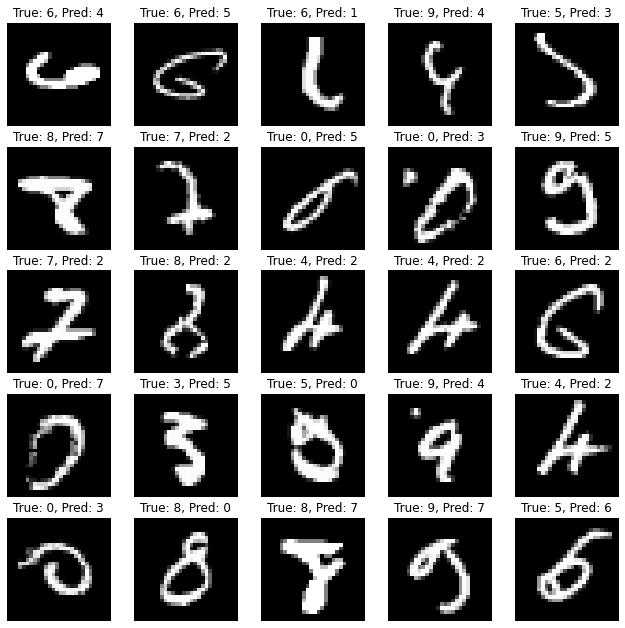

In [15]:
fig, ax = plt.subplots(5,5, figsize=(11,11))

for i, j in enumerate(worst_predictions_indices):
  image = test_images[j]
  true_label = test_labels[j]
  pred_label = predictions_labels[j]
  ax[i//N,i%N].imshow(tf.squeeze(image), cmap='gray')
  ax[i//N,i%N].axis(False)
  ax[i//N,i%N].set_title(f"True: {true_label}, Pred: {pred_label}")

## tf_flowers

### Data preparation

In [1]:
import tensorflow_datasets as tfds

(training_set, validation_set), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)

In [2]:
class_names = ds_info.features['label'].names
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [3]:
for i, (image, label) in enumerate(training_set.take(5)):
    print(f"Image {i} shape: {image.shape} label: {class_names[label]}")

Image 0 shape: (333, 500, 3) label: tulips
Image 1 shape: (212, 320, 3) label: sunflowers
Image 2 shape: (240, 320, 3) label: sunflowers
Image 3 shape: (240, 320, 3) label: roses
Image 4 shape: (317, 500, 3) label: sunflowers


In [4]:
import tensorflow as tf
tf.reduce_min(image).numpy(), tf.reduce_max(image).numpy()

(0, 255)

In [5]:
from tensorflow.keras.layers import Rescaling, Resizing
from tensorflow.keras import Sequential

preprocessing_layer = Sequential([Resizing(256, 256),
                                  Rescaling(1/255.0)
                                  ], name="preprocessing_layer")

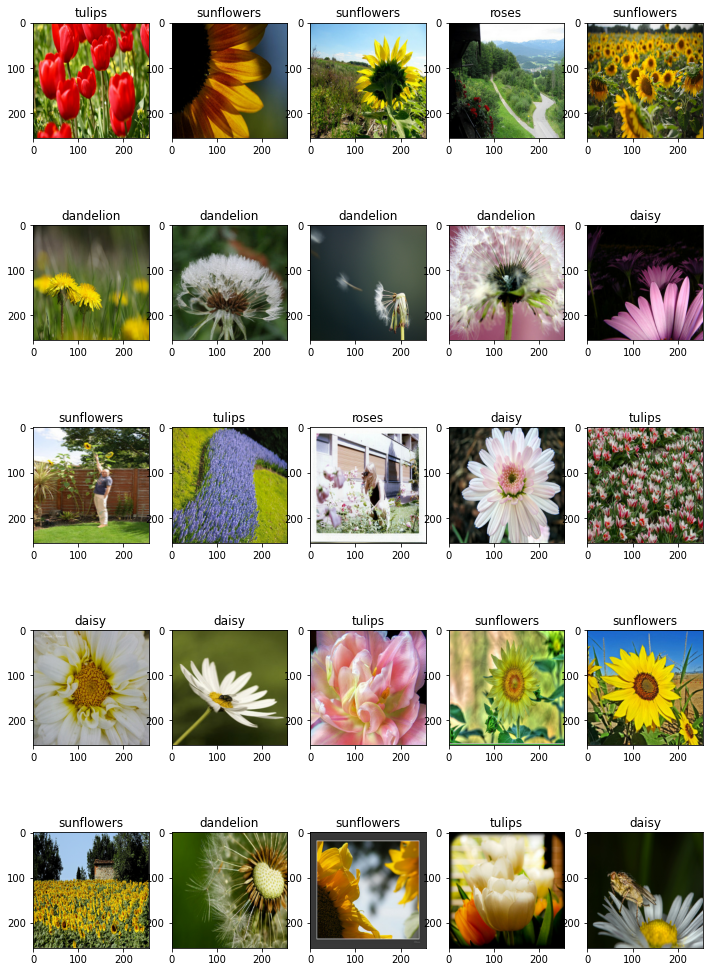

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 5, figsize=(12, 18))

for i, (image, label) in enumerate(training_set.take(25)):
    image = preprocessing_layer(image)
    axs[i//5, i%5].imshow(image)
    axs[i//5, i%5].set_title(class_names[label])

In [7]:
preprocess_img = lambda image, label: (preprocessing_layer(image), label)

train_data = training_set.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
test_data = validation_set.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=20,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator()

In [9]:
from utils import get_images_and_labels_from_dataset

train_images, train_labels = get_images_and_labels_from_dataset(train_data)
test_images, test_labels = get_images_and_labels_from_dataset(test_data)

In [16]:
train_data = train_datagen.flow(train_images,
                                train_labels,
                                batch_size=16)

test_data = test_datagen.flow(test_images,
                              test_labels,
                              batch_size=16)

In [11]:
augmented_images, augmented_labels = train_data.next()

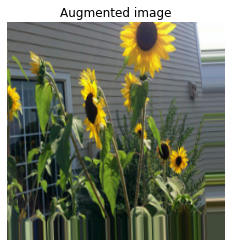

In [12]:
import random
import matplotlib.pyplot as plt

random_number = random.randint(0, 16)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

### Model & Traning

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling, Dropout

MODEL_NAME = "model_tf_flowers"
    
model = Sequential([
                      Conv2D(filters=16, kernel_size=4, input_shape=(256, 256, 3)),
                      MaxPooling2D(pool_size=2, strides=2),
                      Conv2D(filters=32, kernel_size=4, input_shape=(256, 256, 3)),
                      MaxPooling2D(pool_size=2, strides=2),
                      Conv2D(filters=64, kernel_size=4),
                      MaxPooling2D(pool_size=2, strides=2),
                      Conv2D(128, 3, activation="relu"),
                      MaxPooling2D(pool_size=2),
                      Conv2D(128, 3, activation="relu"),
                      MaxPooling2D(pool_size=2),
                      Flatten(),
                      Dropout(0.3),
                      Dense(256, activation="relu"),
                      Dropout(0.3),
                      Dense(5, activation="softmax")
], name=MODEL_NAME)

model.compile(loss="sparse_categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [18]:
from utils import reduce_lr, create_model_checkpoint

history = model.fit(train_data,
                    epochs=15,
                    validation_data=test_data,
                    callbacks=[reduce_lr(), create_model_checkpoint(model.name)])

Epoch 1/15
184/184 [==============================] - ETA: 0s - loss: 1.3883 - accuracy: 0.3924

INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


184/184 [==============================] - 120s 614ms/step - loss: 1.3883 - accuracy: 0.3924 - val_loss: 1.1916 - val_accuracy: 0.4687 - lr: 0.0010
Epoch 2/15
184/184 [==============================] - ETA: 0s - loss: 1.2054 - accuracy: 0.4874

INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


184/184 [==============================] - 115s 622ms/step - loss: 1.2054 - accuracy: 0.4874 - val_loss: 1.1361 - val_accuracy: 0.5177 - lr: 0.0010
Epoch 3/15
184/184 [==============================] - ETA: 0s - loss: 1.1209 - accuracy: 0.5392

INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


184/184 [==============================] - 113s 614ms/step - loss: 1.1209 - accuracy: 0.5392 - val_loss: 1.0176 - val_accuracy: 0.5722 - lr: 0.0010
Epoch 4/15
184/184 [==============================] - ETA: 0s - loss: 1.0229 - accuracy: 0.5926

INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


184/184 [==============================] - 115s 627ms/step - loss: 1.0229 - accuracy: 0.5926 - val_loss: 0.9334 - val_accuracy: 0.5995 - lr: 0.0010
Epoch 5/15
184/184 [==============================] - ETA: 0s - loss: 0.9672 - accuracy: 0.6209

INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


184/184 [==============================] - 108s 587ms/step - loss: 0.9672 - accuracy: 0.6209 - val_loss: 0.8885 - val_accuracy: 0.6540 - lr: 0.0010
Epoch 6/15
184/184 [==============================] - ETA: 0s - loss: 0.9184 - accuracy: 0.6431

INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


184/184 [==============================] - 107s 580ms/step - loss: 0.9184 - accuracy: 0.6431 - val_loss: 0.8555 - val_accuracy: 0.6662 - lr: 0.0010
Epoch 7/15
184/184 [==============================] - ETA: 0s - loss: 0.8904 - accuracy: 0.6597

INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


184/184 [==============================] - 97s 529ms/step - loss: 0.8904 - accuracy: 0.6597 - val_loss: 0.7811 - val_accuracy: 0.6703 - lr: 0.0010
Epoch 8/15
184/184 [==============================] - ETA: 0s - loss: 0.8953 - accuracy: 0.6492

INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


184/184 [==============================] - 81s 439ms/step - loss: 0.8953 - accuracy: 0.6492 - val_loss: 0.7516 - val_accuracy: 0.7003 - lr: 0.0010
Epoch 9/15
184/184 [==============================] - 80s 433ms/step - loss: 0.8660 - accuracy: 0.6679 - val_loss: 0.7773 - val_accuracy: 0.6826 - lr: 0.0010
Epoch 10/15
184/184 [==============================] - 74s 397ms/step - loss: 0.8408 - accuracy: 0.6802 - val_loss: 0.7588 - val_accuracy: 0.6948 - lr: 0.0010
Epoch 11/15
184/184 [==============================] - ETA: 0s - loss: 0.8176 - accuracy: 0.6911
Epoch 11: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
184/184 [==============================] - 79s 426ms/step - loss: 0.8176 - accuracy: 0.6911 - val_loss: 0.7471 - val_accuracy: 0.6785 - lr: 0.0010
Epoch 12/15
184/184 [==============================] - ETA: 0s - loss: 0.7336 - accuracy: 0.7091

INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


184/184 [==============================] - 87s 467ms/step - loss: 0.7336 - accuracy: 0.7091 - val_loss: 0.6404 - val_accuracy: 0.7466 - lr: 1.0000e-04
Epoch 13/15
184/184 [==============================] - ETA: 0s - loss: 0.7057 - accuracy: 0.7187

INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


184/184 [==============================] - 76s 412ms/step - loss: 0.7057 - accuracy: 0.7187 - val_loss: 0.6134 - val_accuracy: 0.7602 - lr: 1.0000e-04
Epoch 14/15
184/184 [==============================] - ETA: 0s - loss: 0.6986 - accuracy: 0.7337

INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


INFO:tensorflow:Assets written to: models\model_tf_flowers\assets


184/184 [==============================] - 82s 448ms/step - loss: 0.6986 - accuracy: 0.7337 - val_loss: 0.6051 - val_accuracy: 0.7684 - lr: 1.0000e-04
Epoch 15/15
184/184 [==============================] - 74s 400ms/step - loss: 0.6847 - accuracy: 0.7313 - val_loss: 0.5944 - val_accuracy: 0.7616 - lr: 1.0000e-04


In [23]:
MODEL_NAME_2 = "model_tf_flowers_2"

history_2 = model.fit(train_data,
                      epochs=30,
                      validation_data=test_data,
                      initial_epoch=15,
                      callbacks=[reduce_lr(), create_model_checkpoint(MODEL_NAME_2)])

Epoch 16/30
184/184 [==============================] - ETA: 0s - loss: 0.6726 - accuracy: 0.7377

INFO:tensorflow:Assets written to: models\model_tf_flowers_2\assets


INFO:tensorflow:Assets written to: models\model_tf_flowers_2\assets


184/184 [==============================] - 75s 406ms/step - loss: 0.6726 - accuracy: 0.7377 - val_loss: 0.6081 - val_accuracy: 0.7684 - lr: 1.0000e-04
Epoch 17/30
184/184 [==============================] - 78s 424ms/step - loss: 0.6511 - accuracy: 0.7514 - val_loss: 0.5773 - val_accuracy: 0.7670 - lr: 1.0000e-04
Epoch 18/30
184/184 [==============================] - ETA: 0s - loss: 0.6625 - accuracy: 0.7466

INFO:tensorflow:Assets written to: models\model_tf_flowers_2\assets


INFO:tensorflow:Assets written to: models\model_tf_flowers_2\assets


184/184 [==============================] - 79s 429ms/step - loss: 0.6625 - accuracy: 0.7466 - val_loss: 0.5802 - val_accuracy: 0.7752 - lr: 1.0000e-04
Epoch 19/30
184/184 [==============================] - ETA: 0s - loss: 0.6483 - accuracy: 0.7514

INFO:tensorflow:Assets written to: models\model_tf_flowers_2\assets


INFO:tensorflow:Assets written to: models\model_tf_flowers_2\assets


184/184 [==============================] - 86s 467ms/step - loss: 0.6483 - accuracy: 0.7514 - val_loss: 0.5666 - val_accuracy: 0.7847 - lr: 1.0000e-04
Epoch 20/30
184/184 [==============================] - ETA: 0s - loss: 0.6403 - accuracy: 0.7592

INFO:tensorflow:Assets written to: models\model_tf_flowers_2\assets


INFO:tensorflow:Assets written to: models\model_tf_flowers_2\assets


184/184 [==============================] - 83s 451ms/step - loss: 0.6403 - accuracy: 0.7592 - val_loss: 0.5670 - val_accuracy: 0.7916 - lr: 1.0000e-04
Epoch 21/30
184/184 [==============================] - 79s 427ms/step - loss: 0.6104 - accuracy: 0.7670 - val_loss: 0.5554 - val_accuracy: 0.7861 - lr: 1.0000e-04
Epoch 22/30
184/184 [==============================] - 81s 436ms/step - loss: 0.6097 - accuracy: 0.7643 - val_loss: 0.5494 - val_accuracy: 0.7916 - lr: 1.0000e-04
Epoch 23/30
184/184 [==============================] - ETA: 0s - loss: 0.6025 - accuracy: 0.7769
Epoch 23: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
184/184 [==============================] - 82s 443ms/step - loss: 0.6025 - accuracy: 0.7769 - val_loss: 0.5728 - val_accuracy: 0.7820 - lr: 1.0000e-04
Epoch 24/30
184/184 [==============================] - ETA: 0s - loss: 0.5844 - accuracy: 0.7752

INFO:tensorflow:Assets written to: models\model_tf_flowers_2\assets


INFO:tensorflow:Assets written to: models\model_tf_flowers_2\assets


184/184 [==============================] - 83s 447ms/step - loss: 0.5844 - accuracy: 0.7752 - val_loss: 0.5373 - val_accuracy: 0.7984 - lr: 1.0000e-05
Epoch 25/30
184/184 [==============================] - ETA: 0s - loss: 0.5852 - accuracy: 0.7663

INFO:tensorflow:Assets written to: models\model_tf_flowers_2\assets


INFO:tensorflow:Assets written to: models\model_tf_flowers_2\assets


184/184 [==============================] - 76s 413ms/step - loss: 0.5852 - accuracy: 0.7663 - val_loss: 0.5326 - val_accuracy: 0.7997 - lr: 1.0000e-05
Epoch 26/30
184/184 [==============================] - 69s 375ms/step - loss: 0.5780 - accuracy: 0.7755 - val_loss: 0.5337 - val_accuracy: 0.7929 - lr: 1.0000e-05
Epoch 27/30
184/184 [==============================] - 74s 399ms/step - loss: 0.5722 - accuracy: 0.7776 - val_loss: 0.5278 - val_accuracy: 0.7997 - lr: 1.0000e-05
Epoch 28/30
184/184 [==============================] - ETA: 0s - loss: 0.5651 - accuracy: 0.7732

INFO:tensorflow:Assets written to: models\model_tf_flowers_2\assets


INFO:tensorflow:Assets written to: models\model_tf_flowers_2\assets


184/184 [==============================] - 82s 444ms/step - loss: 0.5651 - accuracy: 0.7732 - val_loss: 0.5254 - val_accuracy: 0.8065 - lr: 1.0000e-05
Epoch 29/30
184/184 [==============================] - 69s 375ms/step - loss: 0.5619 - accuracy: 0.7841 - val_loss: 0.5308 - val_accuracy: 0.8011 - lr: 1.0000e-05
Epoch 30/30
184/184 [==============================] - 77s 414ms/step - loss: 0.5784 - accuracy: 0.7803 - val_loss: 0.5271 - val_accuracy: 0.8011 - lr: 1.0000e-05


### Results

In [27]:
train_datagen = ImageDataGenerator()

train_data = train_datagen.flow(train_images,
                                train_labels,
                                batch_size=16) # not augmented

In [28]:
model_best = tf.keras.models.load_model(f"models/{MODEL_NAME_2}")

_, train_acc = model_best.evaluate(train_data)
_, test_acc = model_best.evaluate(test_data)

46/46 [==============================] - 3s 65ms/step - loss: 0.5254 - accuracy: 0.8065


In [29]:
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 0.8130108714103699
Test accuracy: 0.8065395355224609
